# Introduction and Background

It is a known fact that veterans are at a higher risk of suicide in comparison to the general population, however the extreme degree to which this is true is not nearly as well understood. According to the U.S. Department of Veteran Affairs, in comparison to the general population deployed veterans are at a 41% higher risk of suicide and non-deployed veterans are at a 61% higher risk. These abnormally high rates of suicide could be attributed to many factors that come with the high stress risk of joining the military. Research has been done showing an inverse relation between suicide rates and socioeconomic status when analyzed at a community level, and we are interested how this might relate to the statistic for veterans (Rehkopf DH, Buka SL 2006).

We hypothesize that lower socioeconomic status will increase suicide rates, while better socioeconomic well-being will lower suicide rates among veterans. Specifically, living in a state with a higher Median Household Income implies the veterans in the state live in better socioeconomic conditions and will be less likely to commmit suicide. Likewise, living in a state with low unemployment also implies better socioeconomic living conditions and hence lower chance of veteran suicide. We believe that once veterans leave the military, the structure they are used to is lost. This removal of constant structure might place veterans in a lower than average socioeconomic status, thus placing them at higher risks for mental health issues related to suicide. This is incredibly important as this could help address where veterans suicide resources can best be utilized, as well as identifying which groups need more support post-service.

# Data Description

The following dataset shows the comparison of state suicide rates between American civilians and veterans - we will use this to compare veteran suicide to socioeconomic status.

Dataset Name: Suicide Rates by State
Link to the dataset: https://backhome.news21.com/interactive/suicide-interactive/
Number of observations: 249,874
The following dataset shows the median household income of each U.S. state. We will use this and the next three datasets to create a visualization of socioeconomic status. The columns that we are particularly interested in with this dataset are: 

* state
* vet_pop: Total veteran population of the state for a given year
* overall_pop_18: Total population of individuals over 18
* vet_pop_p: the percentage of the over 18 population that are veterans 
* vet_suicides: Total number of veteran suicides for a state in a given year
* all_suicides: Total suicides for a state in a given year
* vet_suicides_p: Percentage of total suicides that were veterans
* vet_rate: Number of veteran suicides per 100,000 in population 
* civ_rate: Number of civilian suicides per 100,000 in population

Dataset Name: Median Household Income by State
Link to the dataset: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html
Number of observations: 1,768
The following dataset shows the number of employed vs. unemployed Americans and is being used to find unemployment rates of states. We will use this and the next two datasets to create a visualization of socioeconomic status.

Dataset Name: Labor Force Data By County
Link to the dataset: https://www.bls.gov/lau/
Number of observations: 155,826,564*

We plan to look at the datasets to discover if there is a correlation between socioeconomic status and suicide rate. We are using housing price index, median household income, and unemployment rates to judge the socioeconomic status of the state.

*This number is for one year of our data. We will be using 7 years of data for this analysis.

# Data Cleaning/Pre-Processing

At a high level, our approach to Data Cleaning and Processing was to clean the supporting datasets, Median Household Income and Unemployment first, save them to external files in case we wanted to do separate exploratory analyis on them in different notebooks, clean the veteran data, and then ingest the supporting datasets into the veteran data which served as the single dataframe we used for analysis. 

## Clean Median Household Income Data

To clean this data, the first task required a decision to choose data which was either normalized to the current dollar or to the 2016 dollar. As our data is older, it made more sense to go with the 2016 dollar normalization. Right off the bat, the data did not import properly into the Jupyter Notebook due to the formatting of the Excel file. In the excel spreadsheet, each column was labeled by two rows. We fixed this in our Jupyter notebook by looking at both rows and setting our columns to the concatenation of these two rows. There were a few rows that contained labels or were otherwise useless, we dropped these. We then had a dataset which had each state alongside standard error and median income from 1984 to 2016. Standard error was not required for our data analysis so it was also dropped. There were a few duplicate year columns - it appeared that there may have been some controversy over which was more accurate, so both were left in the dataset.

First some imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

Now, let's import the base data into a Pandas Dataframe. We skip the first 59 rows, as they contain a table of values that are NOT normalized to 2016 dollars. The table below this is normalized, we will be using that.

In [2]:
df_median_income = pd.read_excel('Data/Median_Income_States_1984-2016.xls', skiprows=range(59))

Unfortunately, due to the formatting of the data, the columns do not import properly, notice:

In [3]:
print(df_median_income.columns)

Index([        'State',            2016,    'Unnamed: 2',            2015,
          'Unnamed: 4',            2014,    'Unnamed: 6',     '2013 (39)',
          'Unnamed: 8',     '2013 (38)',   'Unnamed: 10',            2012,
         'Unnamed: 12',            2011,   'Unnamed: 14',     '2010 (37)',
         'Unnamed: 16',     '2009 (36)',   'Unnamed: 18',            2008,
         'Unnamed: 20',            2007,   'Unnamed: 22',            2006,
         'Unnamed: 24',            2005,   'Unnamed: 26', '2004(revised)',
         'Unnamed: 28',            2003,   'Unnamed: 30',            2002,
         'Unnamed: 32',            2001,   'Unnamed: 34',     '2000 (30)',
         'Unnamed: 36',     '1999 (29)',   'Unnamed: 38',            1998,
         'Unnamed: 40',            1997,   'Unnamed: 42',            1996,
         'Unnamed: 44',     '1995 (25)',   'Unnamed: 46',     '1994 (24)',
         'Unnamed: 48',     '1993 (23)',   'Unnamed: 50',     '1992 (22)',
         'Unnamed: 52',  

Our first job is to fix them:

In [4]:
columnList = list(map(str,df_median_income.columns))

# We have columns like 'Untitled 2' every other column, because 
# A year applied to two subcolumns. So we will just replace the untitled columns with a
# copy of the corresponding year
for i in range(1, len(columnList), 2):
    columnList[i+1] = columnList[i]
    
newColumns = [(str(column).replace('\n', ' '), subColumn) for column, subColumn in zip(df_median_income.loc[0], columnList)]

df_median_income.columns = newColumns
df_median_income.head()

,"(nan, State)","(Median income, 2016)","(Standard error, 2016)","(Median income, 2015)","(Standard error, 2015)","(Median income, 2014)","(Standard error, 2014)","(Median income, 2013 (39))","(Standard error, 2013 (39))","(Median income, 2013 (38))",...,"(Median income, 1988)","(Standard error, 1988)","(Median income, 1987 (21))","(Standard error, 1987 (21))","(Median income, 1986)","(Standard error, 1986)","(Median income, 1985 (20))","(Standard error, 1985 (20))","(Median income, 1984 (19))","(Standard error, 1984 (19))"
0,NaN,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,...,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror
1,United States,59039,436,57230,325,54398,397,55214,674,53518,...,53124,271,52690,257,52068,270,50258,272,49335,225
2,Alabama,47221,2301,45071,3462,42861,1550,48758,5678,42639,...,38925,1780,39898,2319,40012,1851,39012,1617,38099,1332
3,Alaska,75723,4086,76061,3529,68562,3197,74675,5612,62995,...,64594,2308,67190,3027,65576,2127,74014,2317,71216,3242
4,Arizona,57100,1971,52908,2033,49934,2336,54210,4498,52140,...,51583,1645,54081,1803,53329,1502,50809,1583,47156,1340


Now, we need to take out the first row, as that corresponded to our sublabels.

Also, the last row is garbage, so let's take that out too.

In [5]:
df_median_income.drop([0, df_median_income.shape[0]-1], inplace=True)
df_median_income.head()

,"(nan, State)","(Median income, 2016)","(Standard error, 2016)","(Median income, 2015)","(Standard error, 2015)","(Median income, 2014)","(Standard error, 2014)","(Median income, 2013 (39))","(Standard error, 2013 (39))","(Median income, 2013 (38))",...,"(Median income, 1988)","(Standard error, 1988)","(Median income, 1987 (21))","(Standard error, 1987 (21))","(Median income, 1986)","(Standard error, 1986)","(Median income, 1985 (20))","(Standard error, 1985 (20))","(Median income, 1984 (19))","(Standard error, 1984 (19))"
1,United States,59039,436,57230,325,54398,397,55214,674,53518,...,53124,271,52690,257,52068,270,50258,272,49335,225
2,Alabama,47221,2301,45071,3462,42861,1550,48758,5678,42639,...,38925,1780,39898,2319,40012,1851,39012,1617,38099,1332
3,Alaska,75723,4086,76061,3529,68562,3197,74675,5612,62995,...,64594,2308,67190,3027,65576,2127,74014,2317,71216,3242
4,Arizona,57100,1971,52908,2033,49934,2336,54210,4498,52140,...,51583,1645,54081,1803,53329,1502,50809,1583,47156,1340
5,Arkansas,45907,2165,43339,1592,45542,2581,40573,2475,41132,...,39362,1378,38064,2038,39171,1600,37135,1626,34498,1646


Now, we're good. All we have left to do is get rid of the standard error rows, as we don't need them.

In [6]:
standardErrorColumns = [column for column in df_median_income.columns if column[0].count('Standard error') > 0]
df_median_income.drop(standardErrorColumns, axis=1, inplace=True)
df_median_income.head()

,"(nan, State)","(Median income, 2016)","(Median income, 2015)","(Median income, 2014)","(Median income, 2013 (39))","(Median income, 2013 (38))","(Median income, 2012)","(Median income, 2011)","(Median income, 2010 (37))","(Median income, 2009 (36))",...,"(Median income, 1993 (23))","(Median income, 1992 (22))","(Median income, 1991)","(Median income, 1990)","(Median income, 1989)","(Median income, 1988)","(Median income, 1987 (21))","(Median income, 1986)","(Median income, 1985 (20))","(Median income, 1984 (19))"
1,United States,59039,57230,54398,55214,53518,53331,53401,54245,55683,...,51116,51390,51791,53350,54042,53124,52690,52068,50258,49335
2,Alabama,47221,45071,42861,48758,42639,45436,45438,45061,44724,...,41039,43292,41855,41615,39792,38925,39898,40012,39012,38099
3,Alaska,75723,76061,68562,74675,62995,66535,61271,63682,68914,...,70243,70121,69819,70018,67316,64594,67190,65576,74014,71216
4,Arizona,57100,52908,49934,54210,52140,49178,51872,51625,51166,...,49920,49247,52842,52069,53380,51583,54081,53329,50809,47156
5,Arkansas,45907,43339,45542,40573,41132,40788,44064,42478,40873,...,37696,40061,40289,40598,40070,39362,38064,39171,37135,34498


Furthermore, it seems kind of redundant to continue using "Median income < year >" where "< year >" will suffice. Let's rename the columns once more.

In [7]:
def convertToFinalLabels(column):
    return column[1]

cols = df_median_income.columns
cols = list(map(convertToFinalLabels, cols))

df_median_income.columns = cols

Let's take a look at our cleaned data:

In [8]:
df_median_income.head()

,State,2016,2015,2014,2013 (39),2013 (38),2012,2011,2010 (37),2009 (36),...,1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
1,United States,59039,57230,54398,55214,53518,53331,53401,54245,55683,...,51116,51390,51791,53350,54042,53124,52690,52068,50258,49335
2,Alabama,47221,45071,42861,48758,42639,45436,45438,45061,44724,...,41039,43292,41855,41615,39792,38925,39898,40012,39012,38099
3,Alaska,75723,76061,68562,74675,62995,66535,61271,63682,68914,...,70243,70121,69819,70018,67316,64594,67190,65576,74014,71216
4,Arizona,57100,52908,49934,54210,52140,49178,51872,51625,51166,...,49920,49247,52842,52069,53380,51583,54081,53329,50809,47156
5,Arkansas,45907,43339,45542,40573,41132,40788,44064,42478,40873,...,37696,40061,40289,40598,40070,39362,38064,39171,37135,34498


Now, we're ready to write this cleaned version to a new csv file, so we can use this in other jupyter notebooks

In [9]:
df_median_income.to_json('Data/Clean_Data/median_household_income_normalized.json')

Our one last check is to see that it was correctly written:

In [10]:
pd.read_json('Data/Clean_Data/median_household_income_normalized.json').set_index('State').head()

,1984 (19),1985 (20),1986,1987 (21),1988,1989,1990,1991,1992 (22),1993 (23),...,2008,2009 (36),2010 (37),2011,2012,2013 (38),2013 (39),2014,2015,2016
State,,,,,,,,,,,,,,,,,,,,,
United States,49335,50258,52068,52690,53124,54042,53350,51791,51390,51116,...,56076,55683,54245,53401,53331,53518,55214,54398,57230,59039
D.C.,44918,44849,50866,55508,52180,50015,48805,51377,50738,44675,...,61970,59446,62669,58946,68206,62519,61882,69219,70956,70982
Florida,43547,45417,47785,49512,49575,48768,47545,46851,45877,46713,...,50005,51045,48510,48121,48161,49341,50007,46777,49442,51176
Georgia,43985,44791,50966,54010,51838,51492,49106,46782,48306,51807,...,51532,48483,48566,49047,50304,48881,48420,50239,51410,53527
Hawaii,63558,61627,60655,70807,64440,65500,69346,64032,70642,69803,...,68581,62252,65543,62995,58815,63274,66187,72206,65329,72133


## Clean Unemployment Data

Since Unemployment data is split up between mutliple files seperated by year, we define a `clean` function that will perform roughly the same cleaning on all the files. Because the files come in at the county level, we have to group by state and sum all the counties employment data to arrive at a state level unemployment rate. 

In [11]:
def clean(filename):
    df = pd.read_excel(filename, skiprows=5)
    df.drop(['Unnamed: 0' , 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 5', 'Unnamed: 9'], axis = 1, inplace=True)
    df.columns = ['state', 'year', 'labor force', 'employed', 'unemployed'] # Define meaningful column names 
    year = df.year[0] # Save the year to set it later on 
    df['state']=df['state'].str[-2:] # Take the last two letters in the state column since we don't want county or city
    df = df[:-3] # drop last three rows that were noise
    if(df['labor force'].dtype != 'float64'): # Rows with 'N.A' in numerical columns causes misinterpretation of type. Drop those rows.  
        df = df[df['labor force'] != 'N.A.']
    df[['labor force','employed','unemployed']] = df[['labor force','employed','unemployed']].apply(pd.to_numeric) # Ensure all numerical rows are actually numerical
    df = df.groupby(df.state.values).sum() # Aggregate numerical data by state. 
    df['unemployment rate'] = df['unemployed'] / df['labor force'] * 100 # Calculate an Unemployment rate
    df.year = int(year) # Set the same year for all the rows
    df.reset_index(level=0, inplace=True) # Reset the index to make joins easier downstream
    df['state'] = df['index'] 
    df = df.drop(['index'], axis = 1) # we don't need the 'index' column that was created after resetting the index. 
       
    return df

Now that we have a `clean` function, we can ingest all the files and concatenate them for one dataframe that represents all our unemployment data. 

In [12]:
df_2005 = clean('Data/unemployment_2005.xlsx')
df_2006 = clean('Data/unemployment_2006.xlsx')
df_2007 = clean('Data/unemployment_2007.xlsx')
df_2008 = clean('Data/unemployment_2008.xlsx')
df_2009 = clean('Data/unemployment_2009.xlsx')
df_2010 = clean('Data/unemployment_2010.xlsx')
df_2011 = clean('Data/unemployment_2011.xlsx')

df_unemployment_by_state=pd.concat([df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011], axis=0, ignore_index = True)

Lets check our dataframe

In [13]:
df_unemployment_by_state.head()

,year,labor force,employed,unemployed,unemployment rate,state
0,2005,344564.0,320813.0,23751.0,6.893059,AK
1,2005,2146037.0,2049794.0,96243.0,4.484685,AL
2,2005,1345923.0,1275451.0,70472.0,5.235961,AR
3,2005,2883225.0,2748371.0,134854.0,4.677193,AZ
4,2005,17530070.0,16582652.0,947418.0,5.404531,CA


In [14]:
df_unemployment_by_state.tail()

,year,labor force,employed,unemployed,unemployment rate,state
359,2011,3461432.0,3140192.0,321240.0,9.280552,WA
360,2011,3079767.0,2841002.0,238765.0,7.752697,WI
361,2011,807025.0,741977.0,65048.0,8.060221,WV
362,2011,306815.0,289019.0,17796.0,5.800238,WY
363,2011,350778.0,315171.0,35607.0,10.150865,ia


Export the Dataframe for further processing downstream

In [54]:
df_unemployment_by_state.to_json('Data/Clean_Data/df_unemployment_by_state.json', orient='columns')

## Clean Veteran Data

Load mapping dictionaries to take states to their 2 char codes and vice versa. This is for convenience when working with the different dataframes. 

In [15]:
with open('Data/state_2_code.p', 'rb') as fp:
    state_2_code = pickle.load(fp)

In [16]:
with open('Data/code_2_state.p', 'rb') as fp:
    code_2_state = pickle.load(fp)

Load each year's data and set the appropriate year in the year column

In [17]:
df_2005 = pd.read_csv('Data/vet_2005.csv')
df_2005['year'] = pd.Series(2005, index=df_2005.index)

df_2006 = pd.read_csv('Data/vet_2006.csv')
df_2006['year'] = pd.Series(2006, index=df_2006.index)

df_2007 = pd.read_csv('Data/vet_2007.csv')
df_2007['year'] = pd.Series(2007, index=df_2007.index)

df_2008 = pd.read_csv('Data/vet_2008.csv')
df_2008['year'] = pd.Series(2008, index=df_2008.index)

df_2009 = pd.read_csv('Data/vet_2009.csv')
df_2009['year'] = pd.Series(2009, index=df_2009.index)

df_2010 = pd.read_csv('Data/vet_2010.csv')
df_2010['year'] = pd.Series(2010, index=df_2010.index)

df_2011 = pd.read_csv('Data/vet_2011.csv')
df_2011['year'] = pd.Series(2011, index=df_2011.index)

In [18]:
#Combine into one dataframe

frames = [df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011]
df_vets = pd.concat(frames)


Drop the first column since it contains no data

In [19]:
df_vets = df_vets.drop(df_vets.columns[0], axis=1)

In [20]:
df_vets.head()

,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_males,vet_males_p,vet_females,...,vet_35-54,vet_45_54,vet_50_59,vet_45_64,vet_55_64,vet_60,vet_65,vet_rate,civ_rate,year
0,Alabama,403950,3344721,0.120772,135,535,0.252336,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.419978,13.601875,2005
1,Alaska,74482,446969,0.166638,24,131,0.183206,22.0,0.916667,2.0,...,NaN,9.0,NaN,NaN,5.0,NaN,4.0,32.222550,28.725835,2005
2,Arizona,538880,4238996,0.127124,225,945,0.238095,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.753266,19.458849,2005
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,79.0,0.975309,2.0,...,NaN,NaN,NaN,NaN,16.0,NaN,25.0,31.237466,18.078622,2005
4,California,2193336,25543447,0.085867,633,3206,0.197442,613.0,0.968404,20.0,...,NaN,NaN,NaN,220.0,NaN,NaN,317.0,28.860147,11.019220,2005


Lets check the columns in the vets dataframe

In [21]:
print(df_vets.columns)

Index(['state', 'vet_pop', 'overall_pop_18', 'vet_pop_p', 'vet_suicides',
       'all_suicides', 'vet_suicides_p', 'vet_males', 'vet_males_p',
       'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29', 'vet_17_34',
       'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44', 'vet_40_49',
       'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64', 'vet_55_64',
       'vet_60', 'vet_65', 'vet_rate', 'civ_rate', 'year'],
      dtype='object')


Drop age range and gender columnns, there are too many na values in these columns to reliably report on them. 

In [22]:
drop_col = ['vet_males', 'vet_males_p', 'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29', 'vet_17_34', 'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44', 'vet_40_49', 'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64', 'vet_55_64', 'vet_60', 'vet_65']
df_vets = df_vets.drop(drop_col, axis=1)

In [23]:
print(df_vets.columns)
df_vets.head()

Index(['state', 'vet_pop', 'overall_pop_18', 'vet_pop_p', 'vet_suicides',
       'all_suicides', 'vet_suicides_p', 'vet_rate', 'civ_rate', 'year'],
      dtype='object')


,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_rate,civ_rate,year
0,Alabama,403950,3344721,0.120772,135,535,0.252336,33.419978,13.601875,2005
1,Alaska,74482,446969,0.166638,24,131,0.183206,32.222550,28.725835,2005
2,Arizona,538880,4238996,0.127124,225,945,0.238095,41.753266,19.458849,2005
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,31.237466,18.078622,2005
4,California,2193336,25543447,0.085867,633,3206,0.197442,28.860147,11.019220,2005


Calculate figures strictly for the civilian population to compare with vets

In [24]:
df_vets['civ_pop'] = df_vets['overall_pop_18'] - df_vets['vet_pop']
df_vets['civ_suicides'] = df_vets['all_suicides'] - df_vets['vet_suicides']
df_vets['civ_suicides_p'] = df_vets['civ_suicides'] / df_vets['civ_pop']

Clean out asterisks from state names so that we can use the mapping dictionary. 

In [25]:
df_vets['state'] = df_vets.state.str.replace('*' , '')

print(df_vets.state.unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Map states to their 2 letter codes for easier processing later. 

In [26]:
df_vets['state'] = df_vets['state'].map(state_2_code)

print(df_vets['state'].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA'
 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NH' 'NJ'
 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VT'
 'VA' 'WA' 'WV' 'WI' 'WY']


## Merge the datasets into df_vets

### Load and Merge Median Household Income Data

In [27]:
df_mhi = pd.read_json('Data/Clean_Data/median_household_income_normalized.json')

Limit the median household income data to the years and states that we have veteran data for. Also, convert the States to their 2 letter codes just as we did for the veteran data. 

In [28]:
df_mhi = df_mhi[['2005', '2006', '2007', '2008', '2009 (36)', '2010 (37)', '2011', 'State']]
df_mhi = df_mhi.rename(index=str, columns={"State": "state", "2009 (36)": "2009", "2010 (37)": "2010"})
df_mhi['state'] = df_mhi['state'].map(state_2_code)
df_mhi = df_mhi.drop(df_mhi[~df_mhi.state.isin(df_vets.state)].index) # drop all states that are not in the df_vets dataframe

Merge the data into the appropriate states and years

In [29]:
df_vets['mhi'] = pd.Series(len(df_vets.values))
for year in range(2005, 2012):
    temp = df_mhi[[str(year), 'state']]
    for state in temp['state']:
        df_vets.loc[(df_vets['year'] == year) & (df_vets['state'] == state), 'mhi'] = temp[temp['state'] == state][str(year)].values[0]

### Load and Merge Unemployment Data

In [30]:
df_unemp = pd.read_json('Data/Clean_Data/df_unemployment_by_state.json')

In [31]:
df_vets = pd.merge(df_vets, df_unemp, left_on=['state','year'], right_on=['state','year'])

In [32]:
df_vets.head()

,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_rate,civ_rate,year,civ_pop,civ_suicides,civ_suicides_p,mhi,employed,labor force,unemployed,unemployment rate
0,AL,403950,3344721,0.120772,135,535,0.252336,33.419978,13.601875,2005,2940771,400,0.000136,45657.0,2049794,2146037,96243,4.484685
1,AK,74482,446969,0.166638,24,131,0.183206,32.222550,28.725835,2005,372487,107,0.000287,68690.0,320813,344564,23751,6.893059
2,AZ,538880,4238996,0.127124,225,945,0.238095,41.753266,19.458849,2005,3700116,720,0.000195,55606.0,2748371,2883225,134854,4.677193
3,AR,259304,2023819,0.128126,81,400,0.202500,31.237466,18.078622,2005,1764515,319,0.000181,45053.0,1275451,1345923,70472,5.235961
4,CA,2193336,25543447,0.085867,633,3206,0.197442,28.860147,11.019220,2005,23350111,2573,0.000110,63607.0,16582652,17530070,947418,5.404531


# Data Visualization

## Visualize Median Household Income

Let's see how Median Household Income has moved throughout the years in question

Text(0.5,0.98,'Median Housing Income in Thousands 2005-2011')

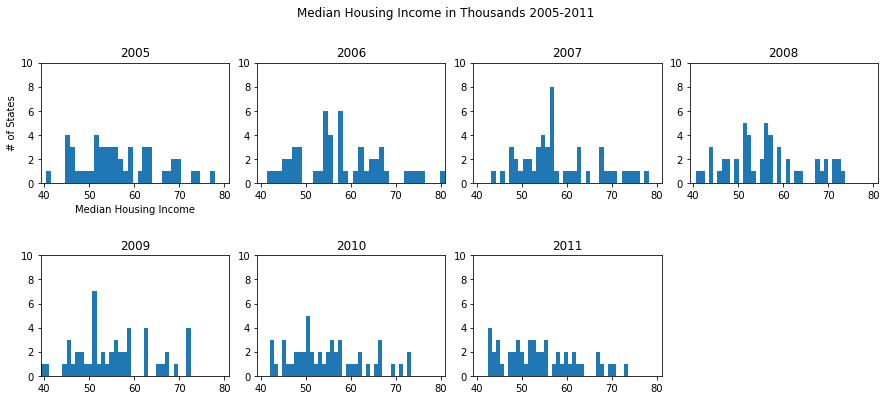

In [33]:
fig, axs = plt.subplots(2,4, figsize=(15, 6))
fig.subplots_adjust(hspace = .6, wspace=.15)
x_lim = [min(df_vets['mhi']) /1000, max(df_vets['mhi']) /1000]
y_lim = [0, 10]

axs = axs.ravel()

def get_axis_limits(ax, scale=.9):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

for ix, x  in df_vets.groupby('year'):
    i = ix - 2005
    axs[i].hist(x['mhi'] / 1000, bins=35)
    axs[i].set_xlim(x_lim)
    axs[i].set_ylim(y_lim)
    axs[i].set_title(f'{str(ix)}') 

axs[0].set_xlabel("Median Housing Income")
axs[0].set_ylabel("# of States")
    
fig.subplots_adjust(top=0.85)    
fig.delaxes(axs[7])
fig.suptitle('Median Housing Income in Thousands 2005-2011')

It appears states at the extreme ends of Median Household Income tend to move closer to the mean as years go by. Also, after 2007, we see a high number of states move toward a lower Median Household Income. This could be explained by the economic downturn experienced late in that year. 

## Visualize Unemployment

Let's perform the same visualization for Unemployment

Text(0.5,0.98,'National Unemployment 2005-2011')

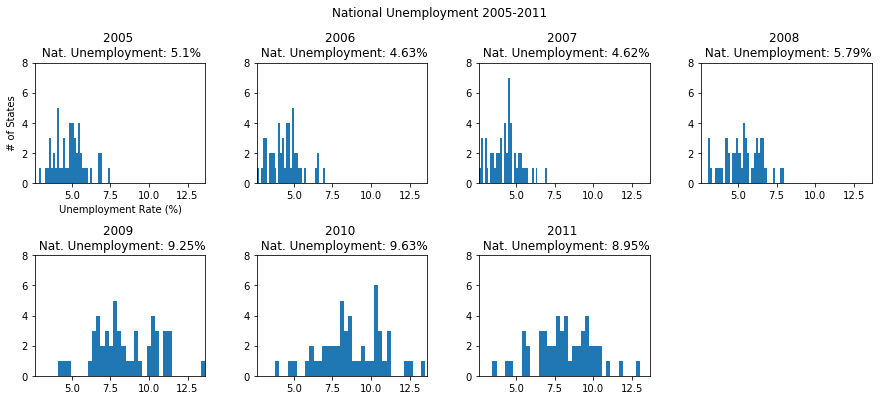

In [34]:
fig, axs = plt.subplots(2,4, figsize=(15, 6))
fig.subplots_adjust(hspace = .6, wspace=.3)
x_lim = [min(df_vets['unemployment rate']), max(df_vets['unemployment rate'])]
y_lim = [0, 8]

axs = axs.ravel()

for ix, x  in df_vets.groupby('year'):
    i = ix - 2005
    nat_rate = round((x['unemployed'].sum() / x['labor force'].sum()) * 100, 2) 
    axs[i].hist(x['unemployment rate'], bins=35)
    axs[i].set_xlim(x_lim)
    axs[i].set_ylim(y_lim)
    axs[i].set_title(f'{str(ix)} \n Nat. Unemployment: {nat_rate}%') 

axs[0].set_xlabel("Unemployment Rate (%)")
axs[0].set_ylabel("# of States")
    
fig.subplots_adjust(top=0.85)    
fig.delaxes(axs[7])
fig.suptitle('National Unemployment 2005-2011')

Here we see a general increase of Unemployment rates across the 50 states with high unemployment in 2010. Note the National Unemployment rate reported above each of the graphs is not the mean of each of the states unemployment rate, but rather the total sum of all unemployed divided by total sum of all labor forces. 

## Visualize Veteran Suicide

Now lets see numbers on Veteran Suicide. The below graph displays the absolute number of veteran suicide vs. civilian suicide over the years.

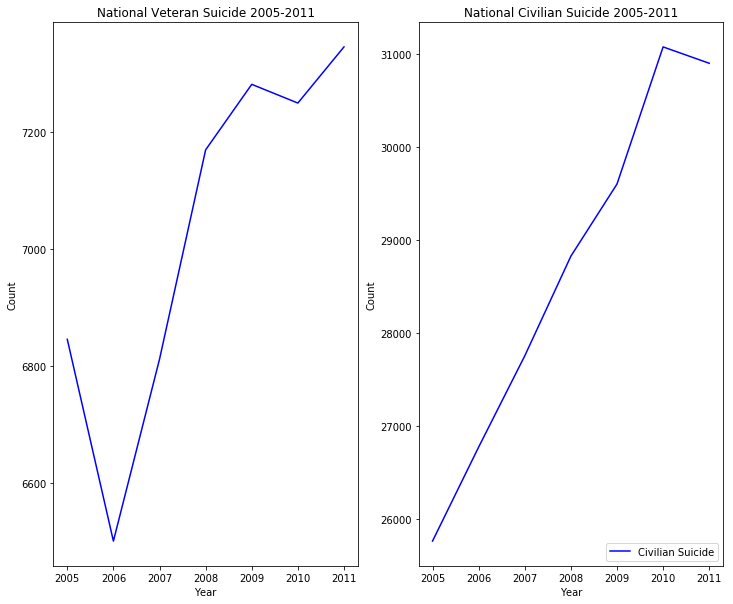

In [35]:
nat_vet_suicide_by_year = df_vets.groupby('year')['vet_suicides'].sum()
nat_civ_suicide_by_year = df_vets.groupby('year')['civ_suicides'].sum()
plt.figure(figsize=(12,10))
plt.legend(loc='lower right')


ax = plt.subplot(1,2,1)
ax.set_title('National Veteran Suicide 2005-2011')
ax.plot(nat_vet_suicide_by_year, color='b', label = 'Veteran Suicide')
plt.xlabel('Year')
plt.ylabel('Count')

ax = plt.subplot(1,2,2)
ax.set_title('National Civilian Suicide 2005-2011')
ax.plot(nat_civ_suicide_by_year, color='b', label = 'Civilian Suicide')
plt.xlabel('Year')
plt.ylabel('Count')

plt.legend(loc='lower right')

Here we see a sharp increase in veteran suicide between 2006 and 2009, with a slight decline from 2009 to 2010, and then an increase. Civilian suicide appears to increase sharply into 2010 and then decline in 2011. Because the above graphs are on two different y-axis scales, we'll plot them together to see how they compare.  

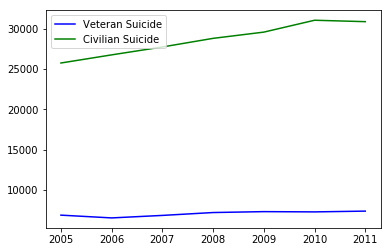

In [36]:
plt.plot(nat_vet_suicide_by_year, color='b', label = 'Veteran Suicide')
plt.plot(nat_civ_suicide_by_year, color='g', label = 'Civilian Suicide')
plt.legend(loc='upper left')

Compared to civilian suicide, veteran suicide does not seem to be increasing by a substantial amount, but this is more than likely a result of the small veteran population compared to civilian population.

Now we will compare veteran suicide across the 50 states for a given year. Lets start with 2005 and see how veteran population compares to veteran suicide and veteran suicide rate (suicide per 100,000 population). We define a function `plot_pop_vs_suicide` to help us with this task. 

In [37]:
def plot_pop_vs_suicide(df, year):
    plt.figure(figsize=(12,10))
    plt.subplot(3, 1, 1)
    x = range(50)
    plt.bar(x, df['vet_pop'])
    plt.xticks([], [])
    plt.title(f'{year} Veteran Population Compared to Veteran Suicide Rate')
    plt.legend(['Veteran Population'])

    plt.subplot(3, 1, 2)
    plt.bar(x, df['vet_suicides'])
    plt.xticks([], [])
    plt.legend(['Veteran suicides'])


    plt.subplot(3, 1, 3)
    plt.bar(x, df['vet_rate'])
    plt.xticks(x, df.index.values, rotation='vertical')
    plt.legend(['Veteran suicide rates'])

    plt.show()

In [38]:
vet_pop_2005 = df_vets[df_vets['year'] == 2005]
vet_pop_2005 = vet_pop_2005.set_index('state')

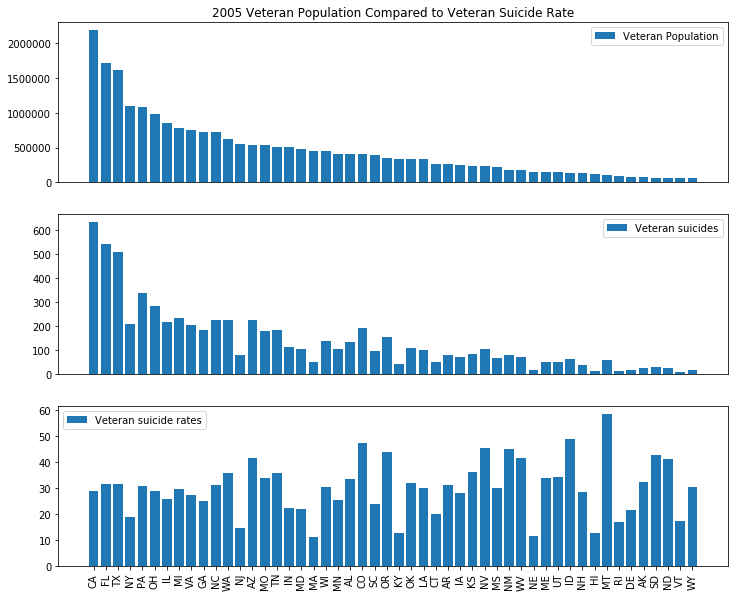

In [39]:
vet_pop_2005 = vet_pop_2005.sort_values(by=['vet_pop'], ascending=False)
plot_pop_vs_suicide(vet_pop_2005, 2005)

Immediately we see that veteran population alone is not enough to explain a high veteran suicide rate. A state like NY has the fourth highest veteran population, yet has a low number of both absolute veteran suicide and veteran suicide rate. If we sort these comparisons by veteran suicide rate, this observation becomes even more clear. 

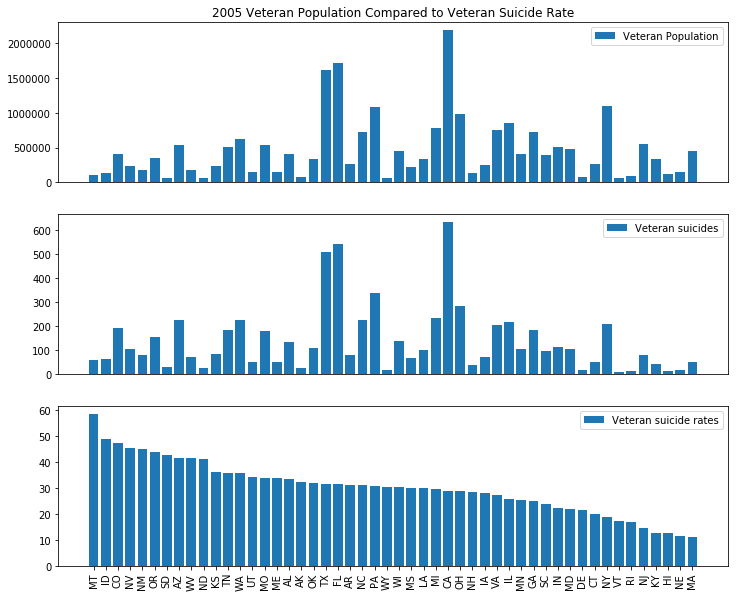

In [40]:
vet_pop_2005 = vet_pop_2005.sort_values(by=['vet_rate'], ascending=False)
plot_pop_vs_suicide(vet_pop_2005, 2005)

Colorado, which has the third highest suicide rate and a noticeable figure for absolute number of suicides, has a relatively small veteran population. The top 5 states for Veteran suicide rate are noteworthy for further investigation. We see similiar rankings in 2011, as well. 

In [41]:
vet_pop_2011 = df_vets[df_vets['year'] == 2011]
vet_pop_2011 = vet_pop_2011.set_index('state')

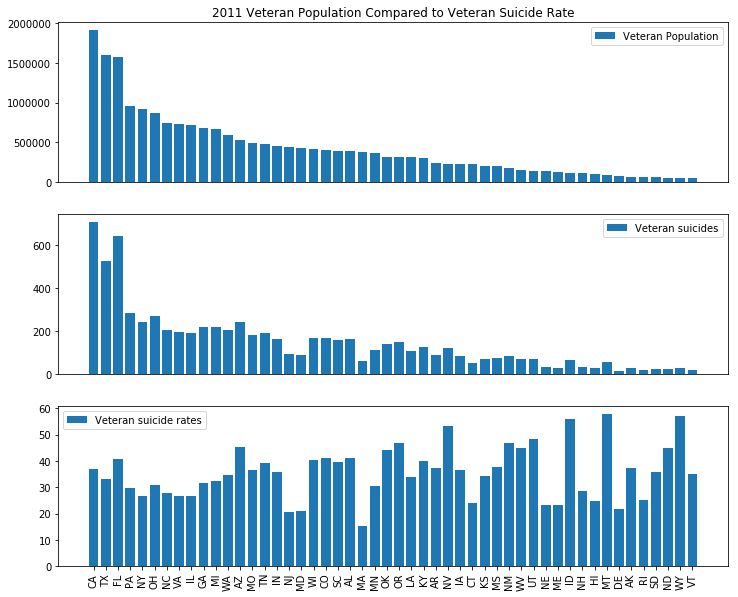

In [42]:
vet_pop_2011 = vet_pop_2011.sort_values(by=['vet_pop'], ascending=False)
plot_pop_vs_suicide(vet_pop_2011, 2011)

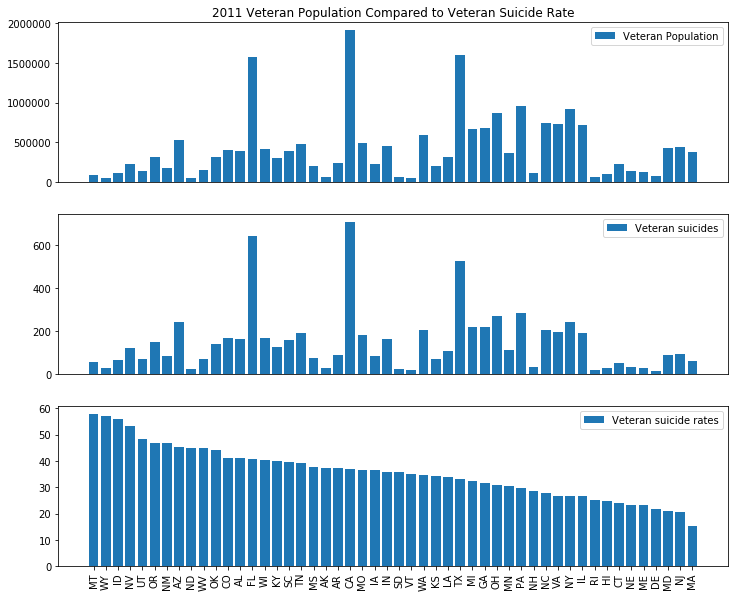

In [43]:
vet_pop_2011 = vet_pop_2011.sort_values(by=['vet_rate'], ascending=False)
plot_pop_vs_suicide(vet_pop_2011, 2011)

## Visualize the combined data

Now that we have seen the general trends in each of the datasets separately, lets combine them to test our hypothesis. 

### Identify Extremes 

Before visualizing relationships, lets see what the extremes of our data look like. 

#### Highest and Lowest Veteran Suicide Rates

In [44]:
df_vets.loc[df_vets['vet_rate'].idxmax()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate', 'unemployment rate']]

state                      MT
year                     2010
mhi                     45443
vet_suicides               68
vet_pop_p            0.124662
vet_rate               71.314
unemployment rate     7.29808
Name: 275, dtype: object

In [45]:

df_vets.loc[df_vets['vet_rate'].idxmin()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate','unemployment rate']]

state                      NE
year                     2006
mhi                     57312
vet_suicides                5
vet_pop_p            0.115304
vet_rate              3.29285
unemployment rate     3.11104
Name: 76, dtype: object

#### Highest and Lowest Median Household Income

In [46]:
df_vets.loc[df_vets['mhi'].idxmax()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate','unemployment rate']]

state                       NJ
year                      2006
mhi                      81018
vet_suicides                93
vet_pop_p            0.0795222
vet_rate               17.6444
unemployment rate      4.70987
Name: 79, dtype: object

In [47]:
df_vets.loc[df_vets['mhi'].idxmin()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate','unemployment rate']]

state                       MS
year                      2009
mhi                      39240
vet_suicides                77
vet_pop_p            0.0935482
vet_rate               37.9027
unemployment rate      9.47759
Name: 223, dtype: object

#### Highest and Lowest Unemployment Rate

In [48]:
df_vets.loc[df_vets['unemployment rate'].idxmax()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate','unemployment rate']]

state                       MI
year                      2009
mhi                      51451
vet_suicides               232
vet_pop_p            0.0928234
vet_rate               32.8218
unemployment rate      13.6584
Name: 221, dtype: object

In [49]:
df_vets.loc[df_vets['unemployment rate'].idxmin()][['state', 'year', 'mhi', 'vet_suicides', 'vet_pop_p', 'vet_rate','unemployment rate']]

state                       UT
year                      2007
mhi                      61964
vet_suicides                68
vet_pop_p            0.0854222
vet_rate               43.7094
unemployment rate      2.58076
Name: 143, dtype: object

Notice above that despite having the lowest unemployment rate in all 50 states and for all 7 years, their veteran suicide rate is relatively high.  

## Visualize correlations between Suicide rates, Median Household Income, and Unemployment Rates.

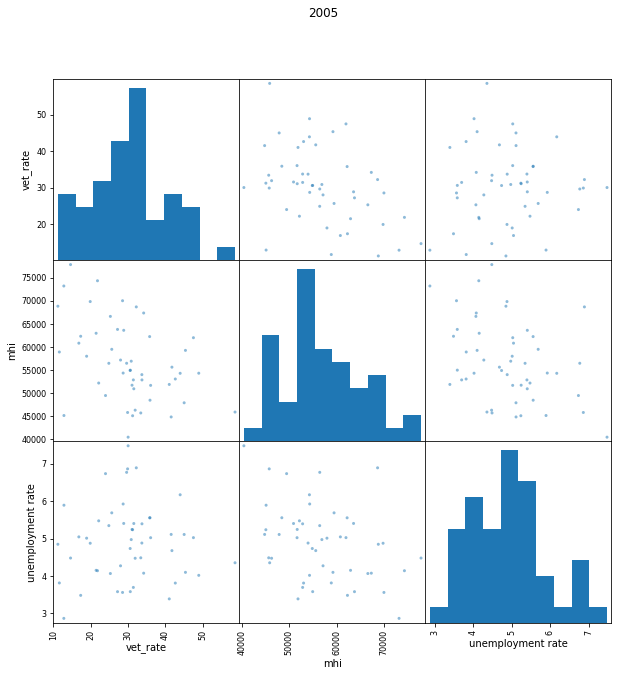

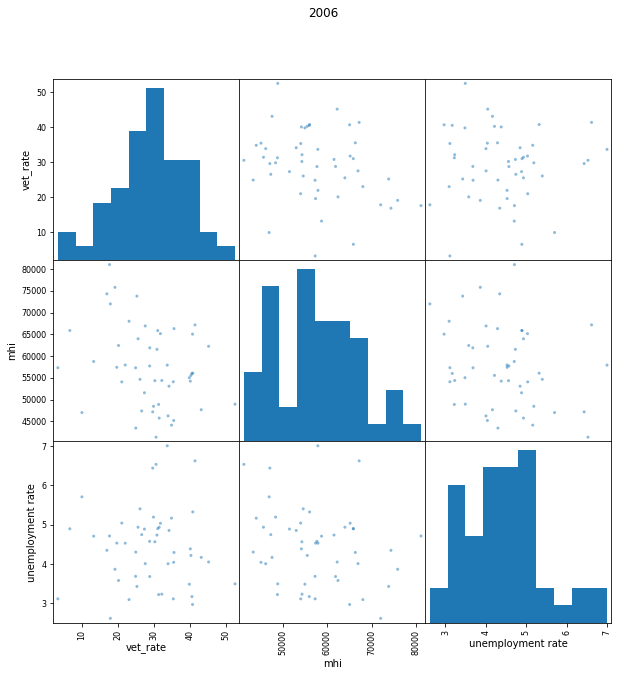

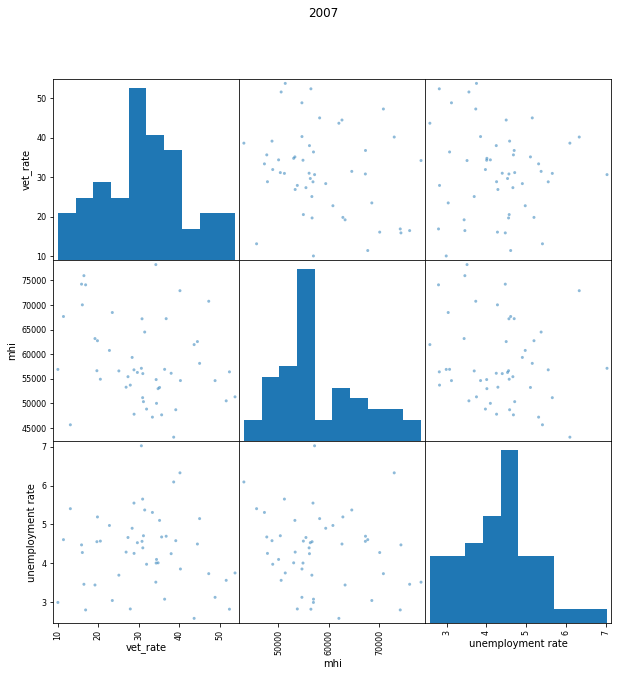

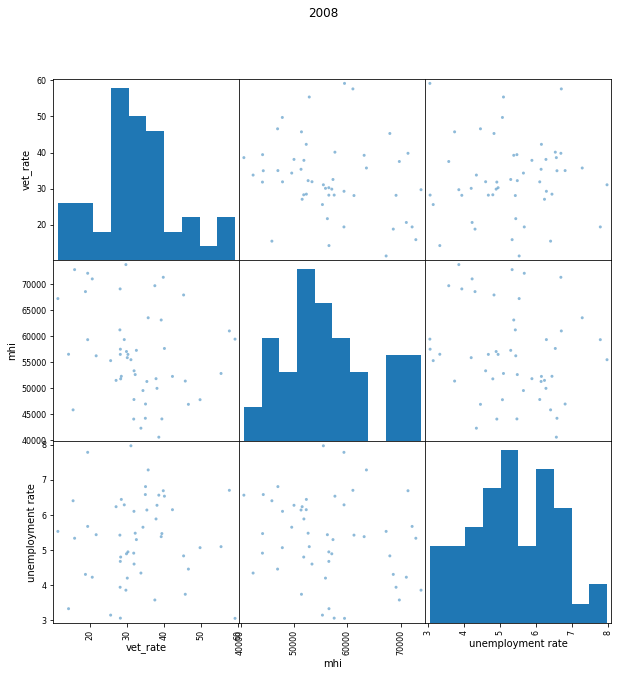

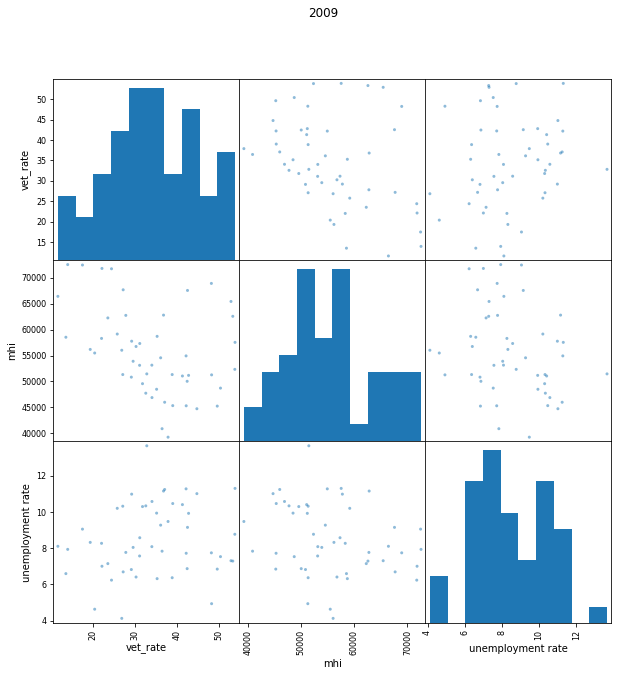

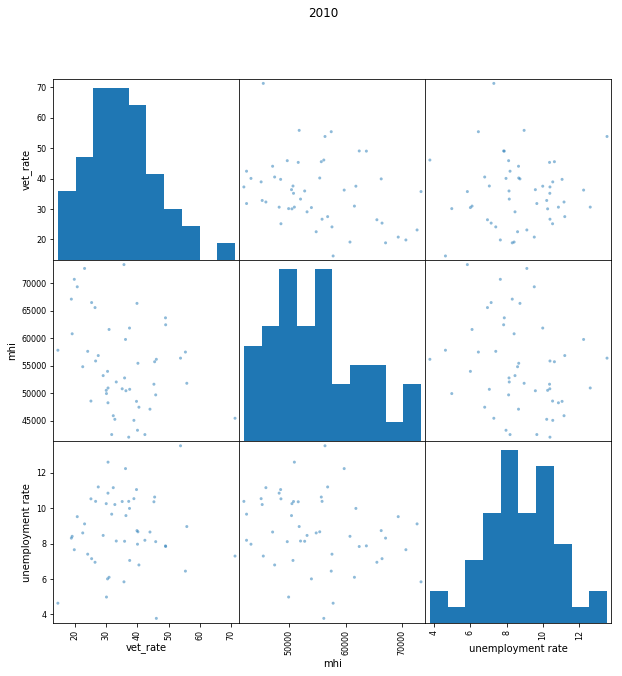

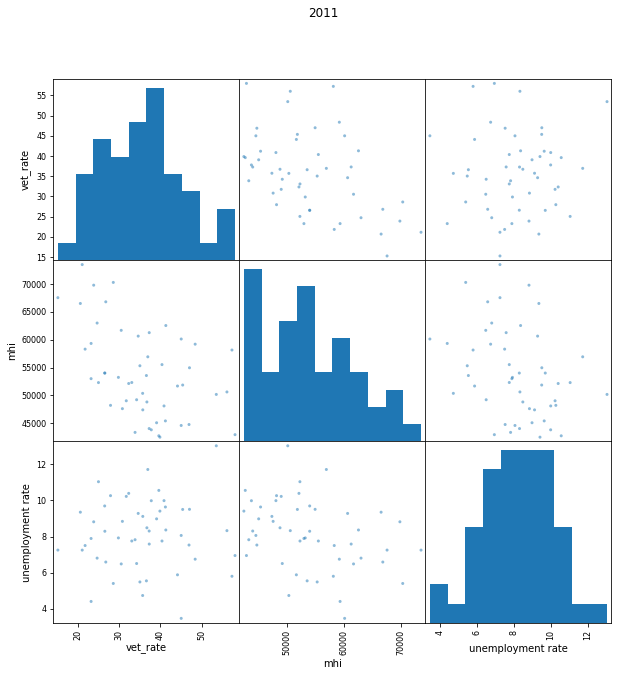

In [50]:
for ix, x  in df_vets.groupby('year'):
    i = ix - 2005
    pd.plotting.scatter_matrix(x[['vet_rate', 'mhi', 'unemployment rate']], figsize  = [10, 10])
    plt.suptitle(ix)
    plt.show()

From the year over year scatter matrices, we see that there is a negative correlation between Median Household Income and Veteran Suicide rate, just as we predicted. However, there appears to be no correlation between veteran suicide rate and unemployment rate. Lets explore the relationship between Median Household Income and Veteran Suicide Rate for now. 

# Data Analysis and Results

## Focus on scatter plots of Median Household Income vs. Suicide Rate throughout the years

Here we'll enlarge the scatter plots of Median Household Income vs. Veteran Suicide Rate and draw lines of best fit to further illustrate our observations. 

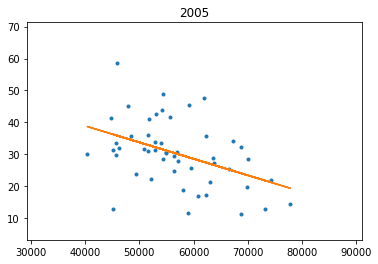

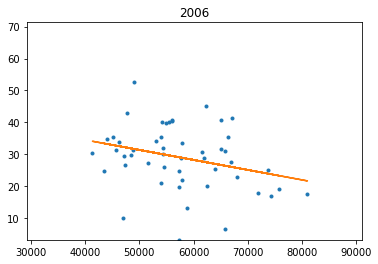

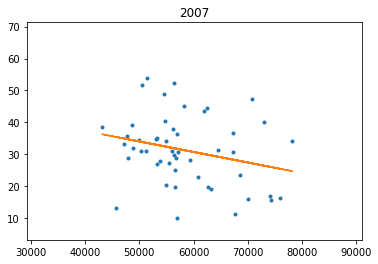

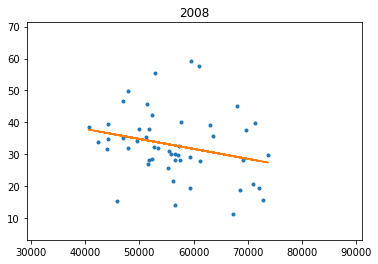

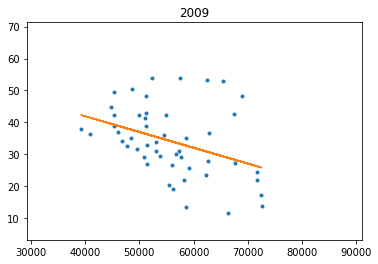

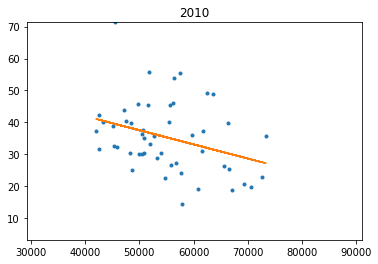

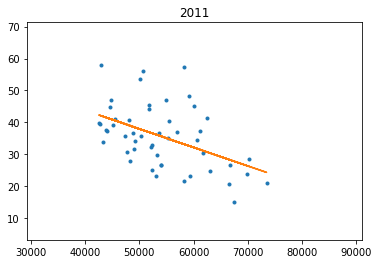

In [51]:
xlim = [min(df_vets['mhi']) - 10000, max(df_vets['mhi']) + 10000]
ylim = [min(df_vets['vet_rate']), max(df_vets['vet_rate'])]

for ix, x  in df_vets.groupby('year'):
    plt.figure()
    m, b = np.polyfit(x['mhi'], x['vet_rate'], 1)
    plt.plot(x['mhi'], x['vet_rate'], '.')
    plt.plot(x['mhi'], m*x['mhi'] + b, '-')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(ix)

Very clearly, throughout the 7 years in question, Median Household Income seems to have a correlation with veteran suicide rate, such that states with a higher Median Household Income have a lower Veteran Suicide Rate. What these scatter plots also provide are potential outliers that we can study in greater detail later on. But for now, let us focus on Unemployment vs. Veteran Suicide Rate. 

## Focus on scatter plots of Unemployment Rate vs. Suicide Rate throughout the years

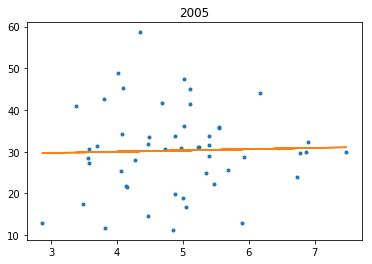

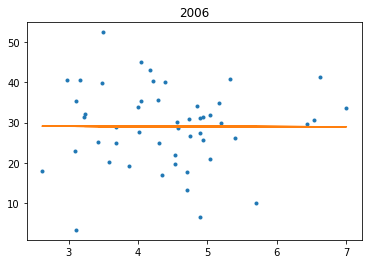

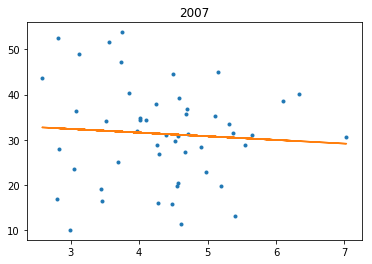

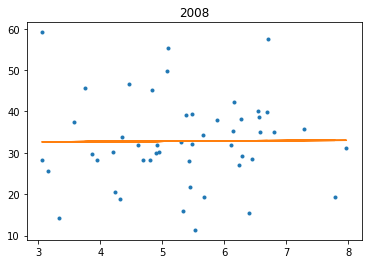

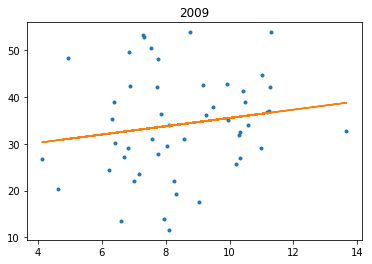

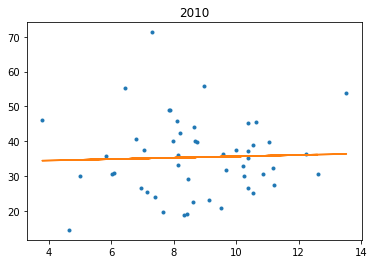

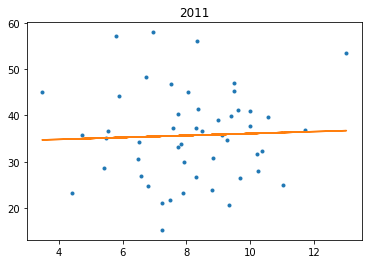

In [52]:
for ix, x  in df_vets.groupby('year'):
    plt.figure()
    m, b = np.polyfit(x['unemployment rate'], x['vet_rate'], 1)
    plt.plot(x['unemployment rate'], x['vet_rate'], '.')
    plt.plot(x['unemployment rate'], m*x['unemployment rate'] + b, '-')
    plt.title(ix)

Just as we initially observered with the scatter plot matrices, there is next to no correlation between unemployment rates and veteran suicide rates. This invalidates the second of our initial hypotheses.

# Privacy/Ethics Considerations

As our data was pulled from a census survey, there exists some inherent bias within the survey process. For example, 

The data we are accessing is publicly available for use, and we were unable to find any permission restrictions. However, as the data does concern veterans there is an increased necessity for protection of data which involves identifying information. We were lucky enough to find a dataset which had minimal identifying information (only involving state, year of death, and number of suicides within that state), and we dropped potentially identifying columns like gender and age group. One potential issue arises in states where there are few suicides within a given year - it would not be incredibly difficult to track down certain individuals within the armed forces who had committed suicide in a specific state during a specific year. The one potential ethical issue that we have discussed involves veterans data, however our datasets do not include any protected information as they are representative of the overall population rather than specific people. If something of this sort were to arise, we could easily mitigate the issue by removing the sensitive information (such as names or zip codes).

There is always the potential for bias within datasets; however, as our datasets are quite large, the potential for bias is significantly reduced. Additionally, the majority of our data was collected by government agencies (such as the U.S. Census Bureau and The Center for Disease Control) who are using reliable data collection methods so as to limit the amount of bias within the data collection process. As such, it is unlikely to come across bias across data since they are collected through similarly regimented and structured methods. If we identify any issues in regards to privacy or bias, we will simply remove that problematic data. With datasets as large as ours, removal of a relatively small amount of data should not have a strong impact on our data analysis.

# Conclusions and Discussion

Based on our initial findings we've concluded that median household income has a strong correlation with veteran suicide rates whereas unemployment does not. The first finding supported our hypothesis and the second did not. This is suprising given the fact that one could foresee how difficulty in finding employment would be a significant stress factor, especially for veterans who are leaving secure employment after their departure from the military. Although we were able to identify a strong correlation with median household income and veteran suicide rate, this alone is not enough to identify causal factors for veteran specific suicide. In fact, we have not yet performed the same analysis for the civilian population, however, we predict that similiar correlations exist for that population as well. This leads to a counterpoint we considered during the creation of this report, the variables that we are analyzing here could just as easily apply to the civilian population. Thus there is currently a lack of explanatory power for veteran specific suicides in our analysis. Quite possibly, the correlation we found in this analysis could be better explained with a hidden variable that we have yet to look at: demographics. Research that Maggie Koerth-Baker from FiveThirtyEight , a polling aggregation site, conducted argues that veteran suicide is more a consequence of demographic than it is of military specific circumstances. Koerth-Baker identifies a high rate of suicide in young white males, a population overrepresented in the military [1]. This theory helps explain one of the observations we made above: states that had high veteran suicides and high veteran suicide rates despite low absolute veteran populations were also states with high population of young white males (MT, WY, NV, CO, ID). We will be exploring this assertion further in follow-on analysis by incorporating demographics data from the CDC. Furthermore, we will be exploring comparisons between the veteran and civilian populations in the 50 states across the 7 years to see if median household income disproportionately affects veterans. Finally, the outliers we identified in the above scatter plots warrant furhter investigation. In particular, states with low veteran suicide rates despite low median household income, or states with high veteran suicide rates despite high median household income, may have some characterstic about them that could explain veteran specific factors that lead to suicide.  

[1]: https://fivethirtyeight.com/features/suicide-in-the-military/